Problem description: Our client, Avocado King, is an avocado supplier that sells conventional and organic avocados all over the U.S. The client has given you historical data on the avocado prices/sales in the US market and they want to know how they could use this data and predictive models to gain a competitive edge. They are particularly interested in predicting the prices of avocados and the number of avocados sold.

Importing libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RandomizedSearchCV

Reading the csv file into a dataframe

In [2]:
df1 = pd.read_csv('price-and-sales-data.csv')
df2 = pd.read_csv('google-data.csv')

In [3]:
df1.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [4]:
df2.head()

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [5]:
unqReg  = df['region'].unique()
print('number of regions:',len(unqReg))

NameError: name 'df' is not defined

In [ ]:
unqYEAR = df['year'].unique()
print('year:',unqYEAR,'number of years:',len(unqYEAR))

In [ ]:
unqAVC  = df['type'].unique()
print('avocado types:',unqAVC,'number of avocado types:',len(unqAVC))

Get some statistics like average price, standard deviation, min/max and quantiles. 

In [6]:
df1.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,24259.000000,2.421200e+04,2.426100e+04,2.425500e+04,2.424500e+04,2.427100e+04,2.422700e+04,2.421400e+04,24293.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.384476,3.731937e+06,1.288583e+06,1.209445e+06,1.046621e+05,1.232967e+06,8.693043e+05,3.586079e+05,25806.499886,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.323404e+04,8.225900e+02,3.061135e+03,0.000000e+00,7.319505e+03,4.770445e+03,2.358200e+02,0.000000,2016.000000
50%,1.360000,1.190528e+05,9.855110e+03,2.697755e+04,1.937600e+02,4.625771e+04,3.133734e+04,4.043680e+03,0.000000,2017.000000
75%,1.640000,4.733783e+05,1.141219e+05,1.498719e+05,6.078170e+03,1.394295e+05,1.008827e+05,3.050337e+04,313.890000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


In [7]:
df2.describe()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,52.309623,82.497908,66.991632,32.711297,50.179916,36.062762
std,11.291978,6.845764,14.840890,19.542141,12.261723,12.702157
min,29.000000,56.000000,33.000000,7.000000,15.000000,10.000000
25%,44.500000,79.000000,55.000000,15.000000,42.000000,27.000000
50%,52.000000,83.000000,68.000000,30.000000,50.000000,35.000000
75%,60.000000,87.000000,78.500000,50.500000,59.000000,44.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
# Converting to week to get numerical value
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.week
df1.rename(columns={'Date': 'Week'}, inplace=True)

In [9]:
df1.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [10]:
# Converting to week to get numerical value
df2['Week'] = pd.to_datetime(df2['Week'])
df2['year'] = df2['Week'].dt.year
df2['Week'] = df2['Week'].dt.week

In [11]:
df2.head()

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States),year
0,1,46,76,84,8,51,10,2015
1,2,48,79,76,8,38,29,2015
2,3,48,82,84,9,66,27,2015
3,4,49,82,89,8,44,28,2015
4,5,52,81,82,7,46,42,2015


In [12]:
# Merge dataframes on week
df = pd.merge(df1, df2, how='left', left_on=['Week','year'],right_on=['Week','year'])

Check for NaN values

In [14]:
df.isnull().sum()

Week                                   0
AveragePrice                         913
TotalVolume                          958
4046                                 911
4225                                 919
4770                                 928
TotalBags                            903
SmallBags                            944
LargeBags                            952
XLargeBags                           881
type                                   0
year                                   0
region                                 0
avocado: (United States)               0
organic: (United States)               0
avocado recipe: (United States)        0
avocado toast: (United States)         0
avocado sandwich: (United States)      0
organic avocado: (United States)       0
dtype: int64

In [60]:
(df == 0.0).sum(axis=0) 

Week                                     0
AveragePrice                             0
TotalVolume                              0
4046                                   321
4225                                   116
4770                                  7611
TotalBags                               14
SmallBags                              150
LargeBags                             2744
XLargeBags                           15093
type                                     0
year                                     0
region                                   0
avocado: (United States)                 0
organic: (United States)                 0
avocado recipe: (United States)          0
avocado toast: (United States)           0
avocado sandwich: (United States)        0
organic avocado: (United States)         0
dtype: int64

Need to fill/drop NaN values. I will fill these values with the mean of the value from all regions.

In [15]:
#df_fill = df.copy()
#filnan = list(df.columns)

#for i in filnan[1:10]:
#    df_fill[i] = df_fill[i].fillna(df_fill[i].mean())

df_fill = df.copy()
df_fill.dropna(inplace=True)

In [16]:
df_fill.isnull().sum()

Week                                 0
AveragePrice                         0
TotalVolume                          0
4046                                 0
4225                                 0
4770                                 0
TotalBags                            0
SmallBags                            0
LargeBags                            0
XLargeBags                           0
type                                 0
year                                 0
region                               0
avocado: (United States)             0
organic: (United States)             0
avocado recipe: (United States)      0
avocado toast: (United States)       0
avocado sandwich: (United States)    0
organic avocado: (United States)     0
dtype: int64

In [17]:
df_fill.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,46,76,84,8,51,10
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46,76,84,8,51,10
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,46,76,84,8,51,10
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,46,76,84,8,51,10
5,1,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,conventional,2015,BuffaloRochester,46,76,84,8,51,10


In [19]:
le = preprocessing.LabelEncoder()
df_fill['type'] = le.fit_transform(df_fill['type'])
df_fill['region'] = le.fit_transform(df_fill['region'])
#df_fill = pd.get_dummies(df_fill,drop_first=True)
#df_fill.drop('region', axis=1, inplace=True)
df_fill.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0,46,76,84,8,51,10
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1,46,76,84,8,51,10
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3,46,76,84,8,51,10
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4,46,76,84,8,51,10
5,1,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,0,2015,5,46,76,84,8,51,10


## Prediction of the Total Volume.


Lets start with total volume prediction. Since we want to make a forecast, I will use 2019 data as the test data, not just random samples. Here, the other volumes are linear combination of the total volume and therefore does not make sense to keep. In addition, average price prediction comes after total volume, so this feature is also dropped.

In [20]:
df_tot   = df_fill.copy()
df_tot.drop(df_tot.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)

In [21]:
df_tot.head()

,Week,TotalVolume,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,40873.28,0,2015,0,46,76,84,8,51,10
1,1,435021.49,0,2015,1,46,76,84,8,51,10
3,1,80034.32,0,2015,3,46,76,84,8,51,10
4,1,491738.00,0,2015,4,46,76,84,8,51,10
5,1,116253.44,0,2015,5,46,76,84,8,51,10


In [22]:
df_avg   = df_fill.copy()

# creating data for training
df_train = df_tot[df_tot['year']!=2019]
df_test  = df_tot[df_tot['year']==2019]

X_train = df_train.iloc[:,[0]+[int(x) for x in range(2,len(df_train.iloc[0,:]))]] 
y_train = df_train.iloc[:,1]

X_test = df_test.iloc[:,[0]+[int(x) for x in range(2,len(df_test.iloc[0,:]))]] 
y_test = df_test.iloc[:,1]

In [168]:
X_train['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [24]:
ex_model = ExtraTreesRegressor()

In [25]:
ex_model.fit(X_train,y_train)

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

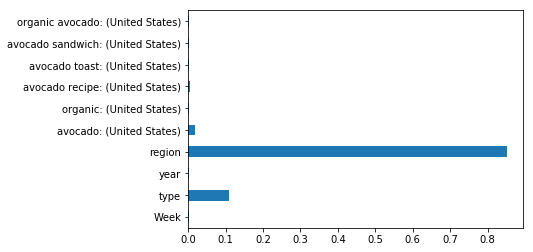

In [26]:
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

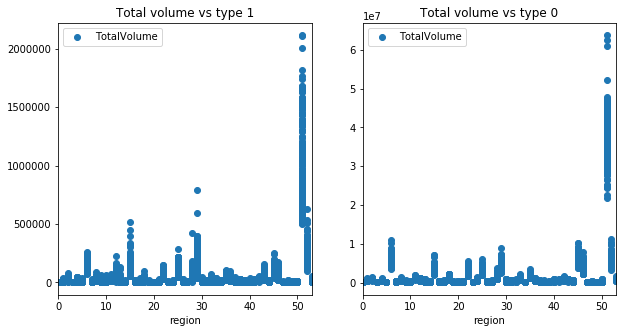

In [173]:
figure, axes = plt.subplots(1, 2)
df_train[df_train['type']==1].plot(x='region', y='TotalVolume', style='o',ax=axes[0],figsize=(10,5),title='Total volume vs type 1')
df_train[df_train['type']==0].plot(x='region', y='TotalVolume', style='o',ax=axes[1],figsize=(10,5),title='Total volume vs type 0')

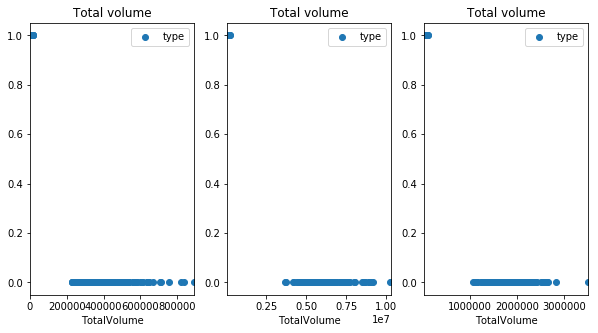

In [179]:
figure, axes = plt.subplots(1, 3)
df_train[df_train['region']==50].plot(x='TotalVolume', y='type', style='o',ax=axes[0],figsize=(10,5),title='Total volume')
df_train[df_train['region']==45].plot(x='TotalVolume', y='type', style='o',ax=axes[1],figsize=(10,5),title='Total volume')
df_train[df_train['region']==35].plot(x='TotalVolume', y='type', style='o',ax=axes[2],figsize=(10,5),title='Total volume')

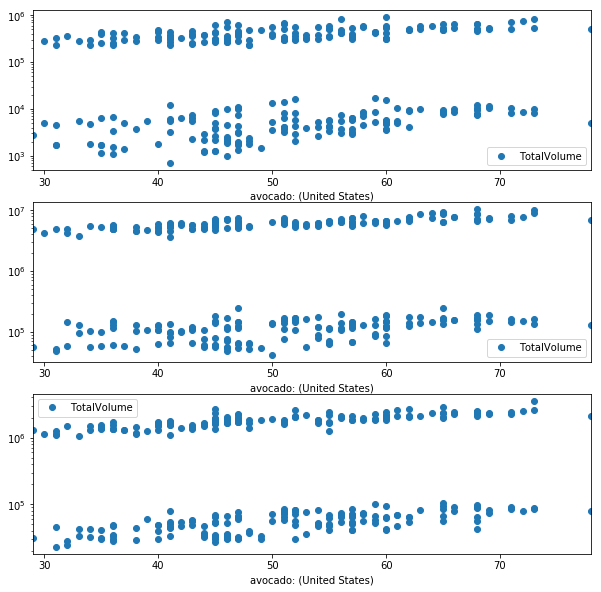

In [181]:
figure, axes = plt.subplots(3, 1)
df_train[df_train['region']==50].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[0],figsize=(10,10))
df_train[df_train['region']==45].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[1],figsize=(10,10))
df_train[df_train['region']==35].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[2],figsize=(10,10))

(0.0001, 0.31622776601683794)

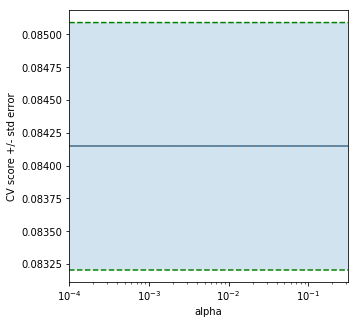

In [162]:
model = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

random_grid = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False)
random_grid.fit(X_train, y_train)
scores = random_grid.cv_results_['mean_test_score']
scores_std = random_grid.cv_results_['std_test_score']
plt.figure(figsize=(5,5))
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'g--')
plt.semilogx(alphas, scores - std_error, 'g--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2) # alpha controls the fill color

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [163]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
pred = model.predict(X_test)

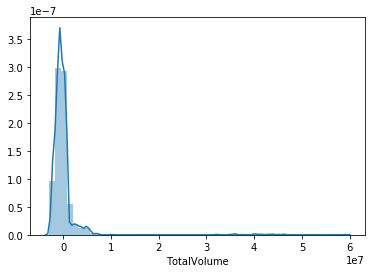

In [165]:
sns.distplot(y_test - pred,bins=50)

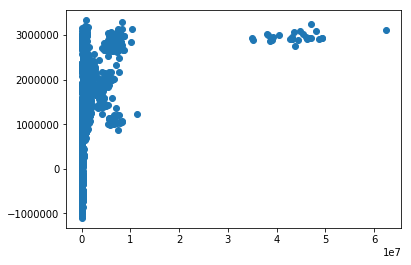

In [167]:
plt.scatter(y_test,pred)

In [166]:
r2_score(y_test,pred)

0.08372533137290938

The relationship between the features and the data is more complex than what a linear relation from Lasso or ridge regression can model. 

Lets try a tree based method instead.

In [125]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=50,num=5)] # The number of trees in the forest
max_features = ['sqrt','log2'] # The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=5,stop=20,num=5)]
min_smp_splt = sorted(np.random.randint(2,10,5))
min_smp_leaf = sorted(np.random.randint(2,10,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 7, 7], 'min_samples_leaf': [2, 3, 6, 7, 7]}


In [139]:
#model = RandomForestRegressor()
model = GradientBoostingRegressor(learning_rate=0.1)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [140]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 7, 7], 'min_samples_leaf': [2, 3, 6, 7, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [141]:
pred = model_random.predict(X_test)

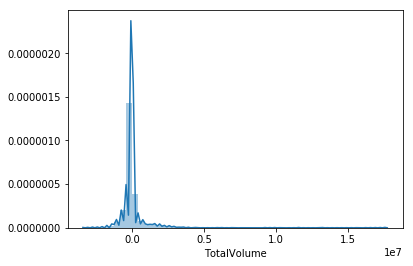

In [161]:
sns.distplot(y_test - pred)

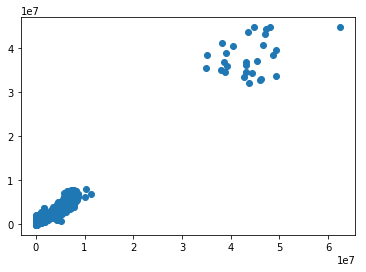

In [143]:
plt.scatter(y_test,pred)

In [144]:
r2_score(y_test,pred)

0.9504659397022875

## Average price prediction.

In [523]:
df_avg   = df_fill.copy()

# drop year column since the year as a numerical value does not say much
df_avg.drop(df_avg.columns[[11]],axis=1,inplace=True)


X = df_avg.iloc[:,[0]+[int(x) for x in range(2,len(df_avg.iloc[0,:]))]] 
y = df_avg.iloc[:,1]

# in this case 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



C:\Users\thomas\Anaconda33\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [525]:
X_train.head()

,Week,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,0,46,76,84,8,51,10
1,1,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,1,46,76,84,8,51,10
3,1,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,3,46,76,84,8,51,10
4,1,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,4,46,76,84,8,51,10
5,1,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,0,5,46,76,84,8,51,10


In [477]:
ex_model = ExtraTreesRegressor()

In [478]:
ex_model.fit(X_train,y_train)

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

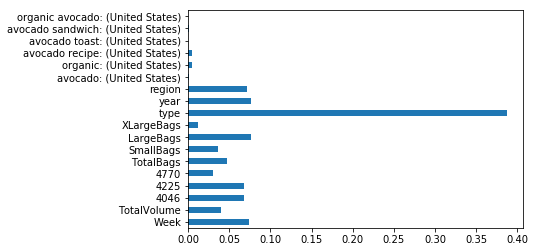

In [479]:
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [480]:
n_estimators = [int(x) for x in np.linspace(start=50,stop=150,num=5)] # The number of trees in the forest
max_features = ['sqrt','log2'] # The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=15,stop=40,num=5)]
min_smp_splt = sorted(np.random.randint(2,15,5))
min_smp_leaf = sorted(np.random.randint(2,15,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [50, 75, 100, 125, 150], 'max_features': ['sqrt', 'log2'], 'max_depth': [15, 21, 27, 33, 40], 'min_samples_split': [2, 6, 11, 13, 14], 'min_samples_leaf': [5, 5, 8, 8, 11]}


In [481]:
model = RandomForestRegressor()
#model = GradientBoostingRegressor(learning_rate=0.01)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=20,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [482]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
exception calling callback for <Future at 0x2013c1dacc0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\externals\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\externals\joblib\parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\externals\joblib\parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\externals\joblib\parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\externals\joblib\parallel.py", line 716, in _dispatch
    job = self._backend.apply_async(batch

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [ ]:
pred = model_random.predict(X_test)
pred

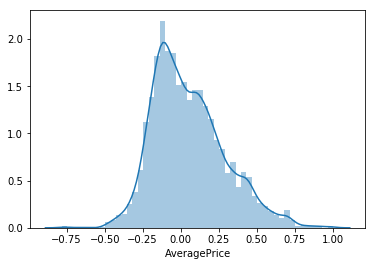

In [448]:
sns.distplot(y_test - pred)

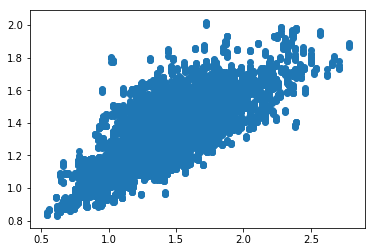

In [449]:
plt.scatter(y_test,pred)

In [450]:
r2_score(y_test,pred)

0.5377029170660171

Lets try the total volum prediction. Here we need to drop the columns representing volumes of the avocado columns, since these are just a linear combination of total volume 

In [ ]:
df_total = df_fill.copy()
df_total.drop(df_total.columns[[3,4,5,6,7,8,9]],axis=1,inplace=True)

# creating data for training
df_train = df_total[df_total['year']!=2019]
df_test  = df_total[df_total['year']==2019]

X_train = df_train.iloc[:,[0]+[int(x) for x in range(2,len(df_avg.iloc[0,:]))]] 
y_train = df_train.iloc[:,1]

X_test = df_test.iloc[:,[0]+[int(x) for x in range(2,len(df_avg.iloc[0,:]))]] 
y_test = df_test.iloc[:,1]


In [ ]:
ex_model.fit(X_train,y_train)

In [ ]:
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()